In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data:

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Input

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
# set the labels as they are ordred in the dataset according to the website:
# https://keras.io/api/datasets/cifar10/
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
# reshape the y to be 1D array:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

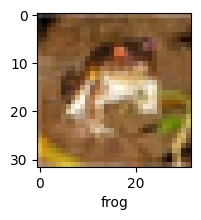

In [9]:
# Plot the image with the corresonded image:
def plot_sample(X, y, index):
    plt.figure(figsize=(2,2))
    plt.imshow(X[index])
    plt.xlabel(labels[y[index]])

plot_sample(X_train, y_train, 0)

In [10]:
# scale the data:
X_train = X_train/255
X_test = X_test/255

## ANN model:

In [12]:
ann = models.Sequential([
    Input(shape=(32, 32, 3)),
    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1000, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [13]:
ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3000)           │     9,219,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     3,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,230,010 (46.65 MB)

 Trainable params: 12,230,010 (46.65 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.3474 - loss: 1.7925
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.3537 - loss: 1.7742
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.3611 - loss: 1.7652
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.3619 - loss: 1.7575
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.3718 - loss: 1.7472
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.3641 - loss: 1.7464
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.3735 - loss: 1.7338
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.3706 - loss: 1.7259
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.3747 - loss: 1.7304
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.3770 - loss: 1.7220


In [49]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4224 - loss: 1.6539


[1.6576708555221558, 0.4205999970436096]

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [51]:
y_pred = ann.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [52]:
y_pred_classes = [np.argmax(e) for e in y_pred]

In [99]:
accuracy_score(y_test, y_pred_classes)

0.4206

In [53]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.51      0.47      0.49      1000
           1       0.60      0.46      0.52      1000
           2       0.36      0.12      0.17      1000
           3       0.25      0.42      0.32      1000
           4       0.33      0.45      0.38      1000
           5       0.47      0.30      0.36      1000
           6       0.41      0.48      0.45      1000
           7       0.50      0.48      0.49      1000
           8       0.56      0.43      0.49      1000
           9       0.42      0.59      0.49      1000

    accuracy                           0.42     10000
   macro avg       0.44      0.42      0.42     10000
weighted avg       0.44      0.42      0.42     10000



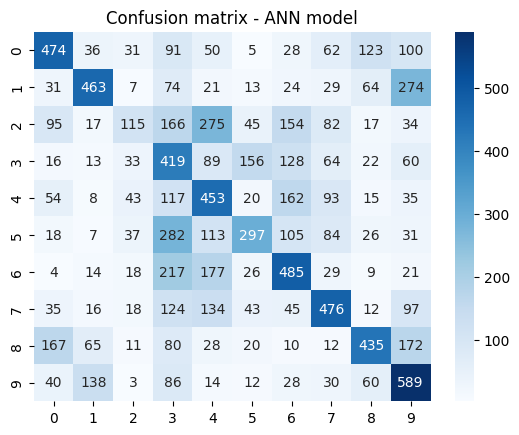

In [80]:
cm = confusion_matrix(y_test, y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion matrix - ANN model")
plt.show()

## CNN model:

In [82]:
cnn = models.Sequential([
    Input(shape=(32, 32, 3)),
    
    # Convolutional layers:
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # Dense layers:
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [84]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [86]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,658 (2.26 MB)

 Trainable params: 591,466 (2.26 MB)

 Non-trainable params: 192 (768.00 B)

In [88]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.1233 - loss: 2.3284
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.1865 - loss: 2.0154
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.2286 - loss: 1.9256
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.3955 - loss: 1.5813
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.5515 - loss: 1.2472
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6043 - loss: 1.1125
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6424 - loss: 1.0133
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6692 - loss: 0.9457
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6855 - loss: 0.8977
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7078 - loss: 0.8461


In [101]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7260 - loss: 0.7943


[0.7964537143707275, 0.7272999882698059]

In [102]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [103]:
y_pred_classes = [np.argmax(e) for e in y_pred]

In [104]:
accuracy_score(y_test, y_pred_classes)

0.7273

In [105]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76      1000
           1       0.87      0.88      0.87      1000
           2       0.68      0.50      0.57      1000
           3       0.52      0.50      0.51      1000
           4       0.69      0.66      0.68      1000
           5       0.56      0.67      0.61      1000
           6       0.76      0.81      0.78      1000
           7       0.76      0.79      0.77      1000
           8       0.90      0.85      0.87      1000
           9       0.75      0.91      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



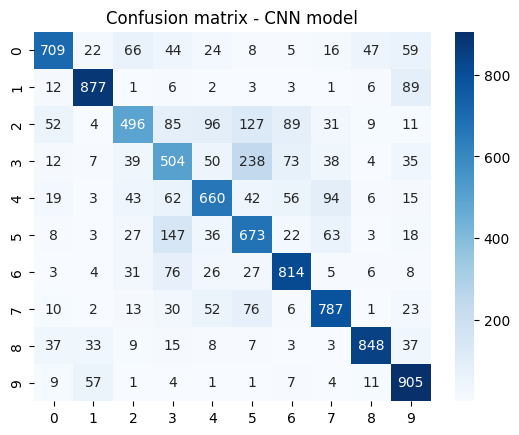

In [106]:
cm = confusion_matrix(y_test, y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion matrix - CNN model")
plt.show()